## Vấn đề

Đã có nhiều nghiên cứu ghi nhận rằng nhiệt độ trung bình toàn cầu đang tăng lên trong thế kỷ qua. Hậu quả của việc nhiệt độ toàn cầu tiếp tục tăng sẽ rất nghiêm trọng. Mực nước biển dâng cao và tần suất xuất hiện các hiện tượng thời tiết cực đoan gia tăng sẽ ảnh hưởng đến hàng tỷ người.

Trong bài toán này, chúng ta sẽ cố gắng nghiên cứu mối quan hệ giữa nhiệt độ trung bình toàn cầu và một số yếu tố khác.


##  Dữ liệu
Link dữ liệu: https://courses.edx.org/asset-v1:MITx+15.071x_2a+2T2015+type@asset+block/climate_change.csv
Tệp climate_change.csv chứa dữ liệu khí hậu từ tháng 5 năm 1983 đến tháng 12 năm 2008. Các biến khả dụng bao gồm:
  
*   Year: Năm theo dõi.
* Month: Tháng theo dõi.
* Temp: sự khác biệt về độ C giữa nhiệt độ trung bình toàn cầu trong thời kỳ đó và một giá trị tham chiếu. Dữ liệu này đến từ Đơn vị Nghiên cứu Khí hậu tại Đại học East Anglia.
* CO2, N2O, CH4, CFC.11, CFC.12:nồng độ trong khí quyển của carbon dioxide (CO2), nitrous oxide (N2O), methane (CH4), trichlorofluoromethane (CCl3F; thường được gọi là CFC-11) và dichlorodifluoromethane (CCl2F2; thường được gọi là CFC-12). Dữ liệu này đến từ Bộ phận Giám sát Toàn cầu ESRL / NOAA.
* CO2, N2O và CH4 được biểu thị bằng ppmv (phần triệu theo thể tích - tức là 397 ppmv CO2 có nghĩa là CO2 chiếm 397 phần triệu tổng thể tích của khí quyển)
* CFC.11 và CFC.12 được biểu thị bằng ppbv (phần tỷ khối lượng). 
* Aerosols: độ sâu quang học trung bình của Aerosols ở tầng bình lưu ở bước sóng 550 nm. Biến số này có liên quan đến núi lửa, vì núi lửa phun trào dẫn đến các hạt mới được thêm vào khí quyển, ảnh hưởng đến lượng năng lượng của mặt trời được phản xạ trở lại không gian. Dữ liệu này là từ Viện Nghiên cứu Không gian Godard tại NASA.
* TSI: tổng bức xạ mặt trời (TSI) tính bằng W / m2 (tỷ lệ năng lượng mặt trời được tích tụ trên một đơn vị diện tích). Do các vết đen và các hiện tượng mặt trời khác, lượng năng lượng do mặt trời tỏa ra thay đổi đáng kể theo thời gian. Dữ liệu này lấy từ trang web của dự án SOLARIS-HEPPA.
* MEI: chỉ số El Nino Southern Oscillation (MEI) đa biến, một thước đo sức mạnh của El Nino / La Nina-Southern Oscillation (một hiệu ứng thời tiết ở Thái Bình Dương ảnh hưởng đến nhiệt độ toàn cầu). Dữ liệu này đến từ Ban Khoa học Vật lý ESRL / NOAA.

In [189]:
import pandas as pd
df = pd.read_csv('climate_change.csv')

In [190]:
#Xem 5 dòng dữ liệu cuối cùng
df.tail()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
303,2008,8,-0.266,384.15,1779.88,321.405,244.200,535.072,1365.6570,0.0036,0.407
304,2008,9,-0.643,383.09,1795.08,321.529,244.083,535.048,1365.6647,0.0043,0.378
305,2008,10,-0.780,382.99,1814.18,321.796,244.080,534.927,1365.6759,0.0046,0.440
306,2008,11,-0.621,384.13,1812.37,322.013,244.225,534.906,1365.7065,0.0048,0.394
307,2008,12,-0.666,385.56,1812.88,322.182,244.204,535.005,1365.6926,0.0046,0.330


In [191]:
#Xem các dữ liệu thống kê
df.describe()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,1995.662338,6.551948,0.275555,363.226753,1749.824513,312.391834,251.973068,497.524782,1366.070759,0.016657,0.256776
std,7.423197,3.447214,0.937918,12.647125,46.051678,5.225131,20.231783,57.826899,0.399610,0.029050,0.179090
min,1983.000000,1.000000,-1.635000,340.170000,1629.890000,303.677000,191.324000,350.113000,1365.426100,0.001600,-0.282000
25%,1989.000000,4.000000,-0.398750,353.020000,1722.182500,308.111500,246.295500,472.410750,1365.717050,0.002800,0.121750
50%,1996.000000,7.000000,0.237500,361.735000,1764.040000,311.507000,258.344000,528.356000,1365.980900,0.005750,0.248000
75%,2002.000000,10.000000,0.830500,373.455000,1786.885000,316.979000,267.031000,540.524250,1366.363250,0.012600,0.407250
max,2008.000000,12.000000,3.001000,388.500000,1814.180000,322.182000,271.494000,543.813000,1367.316200,0.149400,0.739000


Xóa các dòng dữ liệu bị thiếu tham số

In [192]:
df = df.dropna()
df.describe()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,1995.662338,6.551948,0.275555,363.226753,1749.824513,312.391834,251.973068,497.524782,1366.070759,0.016657,0.256776
std,7.423197,3.447214,0.937918,12.647125,46.051678,5.225131,20.231783,57.826899,0.399610,0.029050,0.179090
min,1983.000000,1.000000,-1.635000,340.170000,1629.890000,303.677000,191.324000,350.113000,1365.426100,0.001600,-0.282000
25%,1989.000000,4.000000,-0.398750,353.020000,1722.182500,308.111500,246.295500,472.410750,1365.717050,0.002800,0.121750
50%,1996.000000,7.000000,0.237500,361.735000,1764.040000,311.507000,258.344000,528.356000,1365.980900,0.005750,0.248000
75%,2002.000000,10.000000,0.830500,373.455000,1786.885000,316.979000,267.031000,540.524250,1366.363250,0.012600,0.407250
max,2008.000000,12.000000,3.001000,388.500000,1814.180000,322.182000,271.494000,543.813000,1367.316200,0.149400,0.739000


In [193]:
print(type(df))
# type(df.values)
print(type(df.values))
print(df.values.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
(308, 11)


### Xem các năm

In [194]:
a = df['Year'].values
a

array([1983, 1983, 1983, 1983, 1983, 1983, 1983, 1983, 1984, 1984, 1984,
       1984, 1984, 1984, 1984, 1984, 1984, 1984, 1984, 1984, 1985, 1985,
       1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1986,
       1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986,
       1987, 1987, 1987, 1987, 1987, 1987, 1987, 1987, 1987, 1987, 1987,
       1987, 1988, 1988, 1988, 1988, 1988, 1988, 1988, 1988, 1988, 1988,
       1988, 1988, 1989, 1989, 1989, 1989, 1989, 1989, 1989, 1989, 1989,
       1989, 1989, 1989, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990,
       1990, 1990, 1990, 1990, 1991, 1991, 1991, 1991, 1991, 1991, 1991,
       1991, 1991, 1991, 1991, 1991, 1992, 1992, 1992, 1992, 1992, 1992,
       1992, 1992, 1992, 1992, 1992, 1992, 1993, 1993, 1993, 1993, 1993,
       1993, 1993, 1993, 1993, 1993, 1993, 1993, 1994, 1994, 1994, 1994,
       1994, 1994, 1994, 1994, 1994, 1994, 1994, 1994, 1995, 1995, 1995,
       1995, 1995, 1995, 1995, 1995, 1995, 1995, 19

### Chia tập train, test

In [195]:
df_train = df[df['Year'] <= 2006]
df_test = df[df['Year'] > 2006]

In [196]:
df_train.tail()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
279,2006,8,0.759,380.45,1762.66,319.930,248.981,539.682,1365.7067,0.0041,0.482
280,2006,9,0.793,378.92,1776.04,320.010,248.775,539.566,1365.8419,0.0043,0.425
281,2006,10,0.892,379.16,1789.02,320.125,248.666,539.488,1365.8270,0.0044,0.472
282,2006,11,1.292,380.18,1791.91,320.321,248.605,539.500,1365.7039,0.0049,0.440
283,2006,12,0.951,381.79,1795.04,320.451,248.480,539.377,1365.7087,0.0054,0.518


In [197]:
feature_names = df.columns.drop(['Year', 'Month', 'Temp'])
feature_names

Index(['MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI', 'Aerosols'], dtype='object')

In [198]:
X_train = df_train[feature_names]
y_train = df_train['Temp']

X_test = df_test[feature_names]
y_test = df_test.Temp

In [199]:
X_train.head()
# X_train.values

,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols
0,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863
1,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794
2,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731
3,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673
4,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619


### Chuẩn hóa

In [200]:
from sklearn.preprocessing import StandardScaler

# Tìm mean và std để thực hiện chuẩn hóa
scaler = StandardScaler().fit(X_train)
#Mean của các cột
print (scaler.mean_)

[3.41922535e-01 3.61414261e+02 1.74584148e+03 3.11657225e+02
 2.52487092e+02 4.94217546e+02 1.36610144e+03 1.77207746e-02]


In [201]:
# Chuẩn hóa dữ liệu: x -> (x-mean)/std
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Xây dựng mô hình

In [202]:
from sklearn.linear_model import LinearRegression

In [203]:
climate_model1 = LinearRegression()
climate_model1.fit(X_train_scaled, y_train)

LinearRegression()

## Đánh giá
rootMSE

In [204]:
from sklearn.metrics import mean_squared_error
import numpy as np

# performance on TEST SET
y_pred_test = climate_model1.predict(X_test_scaled)
print ('RMSE on Test set: {:.3f}'.format(
    np.sqrt(mean_squared_error(y_test, y_pred_test))
))

# performance on TRAINING SET
y_pred_train = climate_model1.predict(X_train_scaled)
print ('RMSE on Training set: {:.3f}'.format(
    np.sqrt(mean_squared_error(y_train, y_pred_train))
))


RMSE on Test set: 0.095
RMSE on Training set: 0.090


<AxesSubplot:>

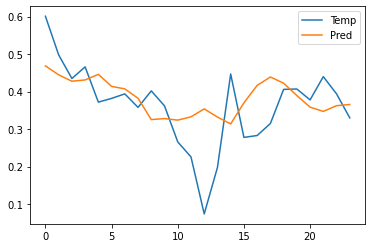

In [205]:
df_plot = pd.DataFrame()
df_plot['Temp'] = y_test.values
df_plot['Pred'] = y_pred_test
df_plot.plot()

<AxesSubplot:>

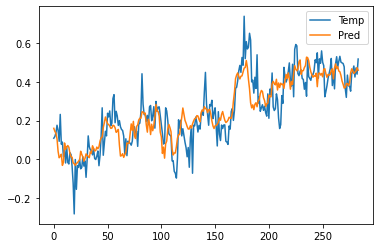

In [206]:
df_plot = pd.DataFrame()
df_plot['Temp'] = y_train.values
df_plot['Pred'] = y_pred_train
df_plot.plot()